In [1]:
# First we have to do EDA(Exploratory Analysis) 
# We must need to import necessory libirary
import pandas as pd
import numpy as np


In [2]:
insurance=pd.read_csv('./data/insurance.csv')
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
insurance.groupby('sex')['children'].sum().reset_index()

,sex,children
0,female,711
1,male,754


In [10]:

stringc=list(insurance.select_dtypes(include='O').columns)
integerc=list(insurance.select_dtypes(exclude='O').columns)


In [22]:
insurance[insurance.columns[insurance.dtypes=="float64"]]

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


In [263]:
# check any null values present or not

insurance.isnull().sum() 
# below we could see there is no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [264]:
def basic_analysis(data):
    rows,columns=data.shape
    print(f"{rows} ROW and {columns} COLUMNS")
basic_analysis(insurance)

1338 ROW and 7 COLUMNS


In [265]:
#Duplicate value present or not

insurance.duplicated().sum() #yes there is only one value

1

In [266]:
insurance[insurance.duplicated()==True] # below values which is present in multiple time we should remove duplicate

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [267]:
insurance.drop_duplicates(inplace=True)
insurance[insurance.duplicated()==True] #Now below we dont have any null values

,age,sex,bmi,children,smoker,region,charges


In [268]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [269]:
# We need to check unique values

insurance.nunique() # we are getting unique values of each and every columns

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [270]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [271]:
# we are gonna getting the statistics of numerical columsn
insurance.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [272]:
# we are gonna find how many numerical columns and catogorical columns
def eda_numeric_cat(insurance):
    insurance_numeric_feature=[f for f in insurance.columns if insurance[f].dtype!='O']

    insurance_catogorical_feature=[f for f in insurance.columns if insurance[f].dtype=='O']

    print(" we have {} Numeric columns:{}".format(len(insurance_numeric_feature),insurance_numeric_feature))
    print(" we have {} Numeric columns:{}".format(len(insurance_catogorical_feature),insurance_catogorical_feature))

    # we are gonna find unique values of the catogorical columns

    print("\n 'sex' columns uniquew values:",end="")
    print(insurance['sex'].unique())
    print("\n 'Smoker' columns uniquew values:",end="")
    print(insurance['smoker'].unique())
    print("\n 'Region' columns uniquew values:",end="")
    print(insurance['region'].unique())
    
eda_numeric_cat(insurance)



 we have 4 Numeric columns:['age', 'bmi', 'children', 'charges']
 we have 3 Numeric columns:['sex', 'smoker', 'region']

 'sex' columns uniquew values:['female' 'male']

 'Smoker' columns uniquew values:['yes' 'no']

 'Region' columns uniquew values:['southwest' 'southeast' 'northwest' 'northeast']


In [273]:
# Adding the columns names as age 
# the range between 0-30 consider as "young"
# 30-60 as consider as "middle Aged"
insurance['age_range']="old"
insurance.loc[(insurance['age']>=0)& (insurance['age']<30),'age_range']="young"
insurance.loc[(insurance['age']>=31)& (insurance['age']<=60),'age_range']="middle-aged"
insurance.head(5)



,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged


In [274]:
#adding BMI range columns where bmi is <18.5 considered as underweight
#adding BMI range columns where bmi is 18.5 - 24.9 false considered as overweight
#adding BMI range columns where bmi is 39 false considered as obese
insurance['bmi_range']='normal'
insurance.loc[insurance['bmi']<18.5,"bmi_range"]="underweight"
insurance.loc[(insurance['bmi']>25.0)&(insurance['bmi']<29.9),"bmi_range"]="overweight"
insurance.loc[insurance['bmi']>30.0,"bmi_range"]="obese"
insurance.head()


,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged,overweight


In [275]:
insurance['sex'].value_counts()
#insurance.value_counts('sex')

sex
male      675
female    662
Name: count, dtype: int64

In [276]:
insurance.value_counts('sex')

sex
male      675
female    662
Name: count, dtype: int64

In [277]:
insurance.value_counts(['sex','age_range'])

sex     age_range  
male    middle-aged    402
female  middle-aged    401
male    young          215
female  young          201
        old             60
male    old             58
Name: count, dtype: int64

In [278]:
insurance[['sex','smoker']].value_counts()

sex     smoker
female  no        547
male    no        516
        yes       159
female  yes       115
Name: count, dtype: int64

In [301]:
young_df=insurance[insurance.age_range=='young']

def young_person(insurance):
    # finding the len of the young people dataframe
    # here below we are using the same df again and again instead we can perform like we have young df so directly we can get bmi_range underwieght by using young df 
    # no need to search  adn get young values
    total_young=len(insurance[insurance.age_range=='young'])
    # finding  young people who are all overweight & young obese based on the BMI
    young_overweight=len(young_df[young_df['bmi_range']=='overweight'])
    young_obese=len(young_df[young_df['bmi_range']=='obese'])
    young_normal=len(young_df[young_df['bmi_range']=='normal'])
    young_underweight=len(young_df[young_df['bmi_range']=='underweight'])

    print("young_overweight:",young_overweight)
    print("young_obese",young_obese)
    # finding the percentage
    yng_ovrwt_perc=round((young_overweight/total_young)*100,2)
    yng_obs_perc=round((young_obese/total_young)*100,2)
    yng_nml_perc=round((young_normal/total_young)*100,2)
    yng_udr_perc=round((young_underweight/total_young)*100,2)
    print("Young person percentage of overweight:{}%".format(yng_ovrwt_perc))
    print("Young person percentage of obese:{}%".format(yng_obs_perc))
    print("Young person percentage of normal:{}%".format(yng_nml_perc))
    print("Young person percentage of underweight:{}%".format(yng_udr_perc))


young_person(insurance)

    

young_overweight: 112
young_obese 203
Young person percentage of overweight:26.92%
Young person percentage of obese:48.8%
Young person percentage of normal:21.63%
Young person percentage of underweight:2.64%


In [280]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged,overweight


In [281]:
## Next we are gonna do modeling convert cato column to numeric if its necessary or else drop

X1=insurance.drop(columns=['charges','age_range','bmi_range'],axis=1)
y=insurance['charges']

X2=insurance.drop(columns=['age','bmi','charges'],axis=1)





In [282]:
#Data Preprocession this is an another step

num_features=X2.select_dtypes(exclude='object').columns
cat_feature=X2.select_dtypes(include='object').columns


In [283]:
num_features,cat_feature #here we splitted the numeric and cat columns in separate list

(Index(['children'], dtype='object'),
 Index(['sex', 'smoker', 'region', 'age_range', 'bmi_range'], dtype='object'))

In [284]:
#Import necessary libirary for preprocessing ,Below we will apply theese and convert cat to numeric columns
from sklearn.preprocessing import StandardScaler,OneHotEncoder 
from sklearn.compose import ColumnTransformer
scalar=StandardScaler()
one_hot_encoder=OneHotEncoder()

preprocessing=ColumnTransformer([
    ('OneHotEncoder',one_hot_encoder,cat_feature),
    ('StandardScaler',scalar,num_features)
])


In [285]:
print(num_features)
print(cat_feature)

Index(['children'], dtype='object')
Index(['sex', 'smoker', 'region', 'age_range', 'bmi_range'], dtype='object')


In [286]:
#Above we converted those columns as StandardScaler and one_hot_encoder for catagorical colum
X2=preprocessing.fit_transform(X2) # Above we create rule for StandardScalar and one hot once we call that will be excurte

In [287]:

#Once done the preprocessing the we ready to split data into train and test model
#Required Libiraries

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((1069, 16), (268, 16))

In [288]:
#Above we have splited dataset we are ready to train our model and let see whetthe its predicted or not
#Import required libiraries

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [289]:
def evaluate_model(y_test,y_pred):
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mse)
    return mae,mse,r2,rmse

In [290]:
models={
    "LinearRegression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "KNN":KNeighborsRegressor(),
    "RandomForest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor()
}

model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]

    #Train
    model.fit(X_train,y_train)
    #Predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluations
    train_mae,train_mse,train_r2,train_rmse=evaluate_model(y_train,y_train_pred)
    test_mae,test_mse,test_r2,test_rmse=evaluate_model(y_test,y_test_pred)

    print("Model",(list(models.keys()))[i])
    model_list.append((list(models.keys()))[i])

    print("Training Set")
    print("Root Mean Squared Error:{:.4f}".format(train_rmse))
    print("Mean Squared Error:{:.4f}".format(train_mse))
    print("Mean Absolute Error:{:.4f}".format(train_mae))
    print("R2 Score:{:.4f}".format(train_r2))

    print("-"*10)
    print("Testing Set")
    print("Root Mean Squared Error:{:.4f}".format(test_rmse))
    print("Mean Squared Error:{:.4f}".format(test_mse))
    print("Mean Absolute Error:{:.4f}".format(test_mae))
    print("R2 Score:{:.4f}".format(test_r2))

    r2_list.append(test_r2)
    print("*"*25)
    print("\n")


Model LinearRegression
Training Set
Root Mean Squared Error:6542.9042
Mean Squared Error:42809594.7579
Mean Absolute Error:4592.9991
R2 Score:0.6873
----------
Testing Set
Root Mean Squared Error:6488.8329
Mean Squared Error:42104951.8948
Mean Absolute Error:4677.5396
R2 Score:0.7709
*************************


Model Lasso
Training Set
Root Mean Squared Error:6461.5000
Mean Squared Error:41750981.7740
Mean Absolute Error:4663.9765
R2 Score:0.6951
----------
Testing Set
Root Mean Squared Error:6606.5479
Mean Squared Error:43646475.3669
Mean Absolute Error:4867.3568
R2 Score:0.7625
*************************


Model Ridge
Training Set
Root Mean Squared Error:6461.6391
Mean Squared Error:41752779.3177
Mean Absolute Error:4664.8106
R2 Score:0.6950
----------
Testing Set
Root Mean Squared Error:6608.0357
Mean Squared Error:43666135.1979
Mean Absolute Error:4867.6148
R2 Score:0.7624
*************************


Model DecisionTreeRegressor
Training Set
Root Mean Squared Error:4159.7092
Mean Squ

In [291]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model Name,R2 Score
5,RandomForest,0.843853
3,DecisionTreeRegressor,0.834631
6,XGBRegressor,0.822437
4,KNN,0.788655
0,LinearRegression,0.770865
1,Lasso,0.762476
2,Ridge,0.762369


In [292]:
rf=RandomForestRegressor()

rf.fit(X_train,y_train)

rf_pred=rf.predict(X_test)


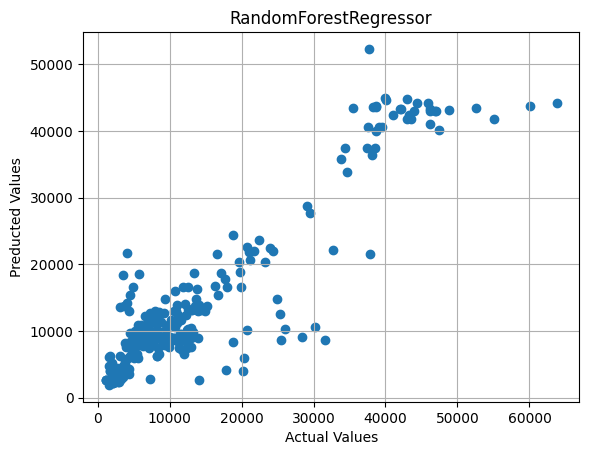

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.scatter(x=y_test,y=rf_pred)
plt.title("RandomForestRegressor")
plt.xlabel('Actual Values')
plt.ylabel('Preducted Values')
# plt.legend(X_test,rf_pred)
plt.grid()

<Axes: xlabel='charges'>

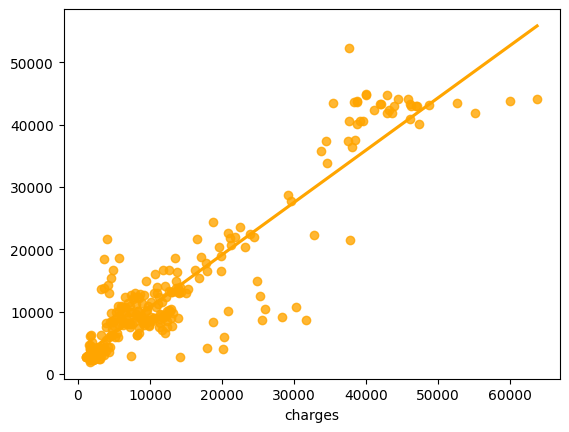

In [294]:
sns.regplot(x=y_test,y=rf_pred,color='Orange',ci=None)

In [295]:
pd.DataFrame({
    "Actual y_test":y_test,
    "Predicted y_test":y_test_pred,
    "difference": y_test-y_test_pred
})

,Actual y_test,Predicted y_test,difference
900,8688.85885,8843.667969,-154.809119
1064,5708.86700,10768.855469,-5059.988469
1256,11436.73815,8834.150391,2602.587759
298,38746.35510,43748.367188,-5002.012087
237,4463.20510,8530.982422,-4067.777322
...,...,...,...
534,13831.11520,13218.333984,612.781216
542,13887.20400,13822.022461,65.181539
760,3925.75820,4736.583496,-810.825296
1284,47403.88000,41316.496094,6087.383906


In [296]:
pd.DataFrame({"actual":y_train_pred}).head(5)

,actual
0,1974.493164
1,4125.266113
2,12611.068359
3,13218.333984
4,9723.143555


In [297]:
sample_data=[ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
       -0.90923416]
sample=rf.predict([sample_data])
print("First value give to our trained model:{:.4f}".format(sample[0]))

First value give to our trained model:17033.0951


In [298]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged,overweight


In [299]:
#I have passed first data to our trained model that is giving the charges value which almost near real value

<p>Visulization Part</p>

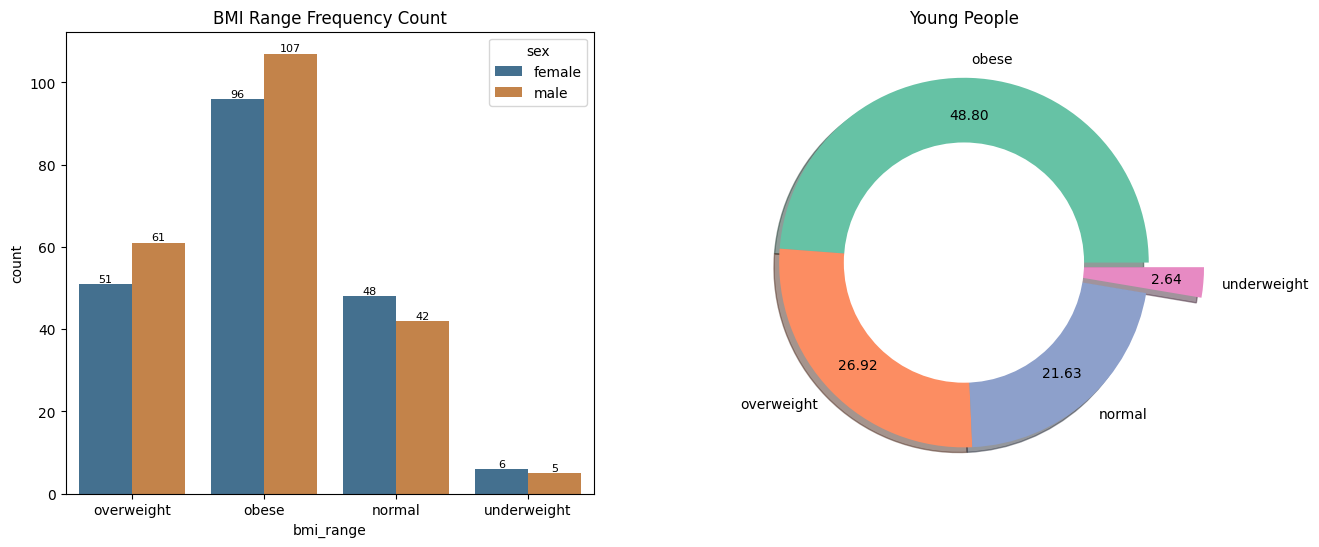

In [316]:
f,ax=plt.subplots(1,2,figsize=(15,6))

sns.countplot(data=young_df,x='bmi_range',hue='sex',ax=ax[0],saturation=0.5)

for container in ax[0].containers:
    ax[0].bar_label(container,size=8)
ax[0].set_title("BMI Range Frequency Count")

plt.pie(x=young_df['bmi_range'].value_counts(),labels=['obese','overweight','normal','underweight'],
        autopct="%.2f",explode=[0,0,0,0.3],shadow=True,colors=sns.color_palette('Set2'),pctdistance=0.80)
        
plt.title("Young People")

hole=plt.Circle((0,0),0.65,facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

What percent of middle-aged and old people have 0 children?

In [319]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,age_range,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,young,overweight
1,18,male,33.770,1,no,southeast,1725.55230,young,obese
2,28,male,33.000,3,no,southeast,4449.46200,young,obese
3,33,male,22.705,0,no,northwest,21984.47061,middle-aged,normal
4,32,male,28.880,0,no,northwest,3866.85520,middle-aged,overweight


In [327]:
middle_age_df=insurance[(insurance['age_range']=='middle-aged')&(insurance['children']==0)]
old_age_df=insurance[(insurance['age_range']=='old')&(insurance['children']==0)]

print("Percentage of middle aged people who have 0 childern:{} & {:.2f}%".format(len(middle_age_df),((len(middle_age_df)/len(insurance))*100)))
print("Percentage of old age people who have 0 childern:{} & {:.2f}%".format(len(old_age_df),((len(old_age_df)/len(insurance))*100)))

Percentage of middle aged people who have 0 childern:265 & 19.82%
Percentage of old age people who have 0 childern:66 & 4.94%
